In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
pwd

'C:\\Users\\vishu'

In [6]:
import os

In [7]:
os.chdir(r"C:\Users\vishu\Downloads\archive(2)")

In [8]:
pwd

'C:\\Users\\vishu\\Downloads\\archive(2)'

In [9]:
len(os.listdir(r"C:\Users\vishu\Downloads\archive(2)/Train"))

43

In [10]:
from PIL import Image
import cv2

In [11]:
Image.open(r"C:\Users\vishu\Downloads\archive(2)/Train/2/00002_00000_00000.png")

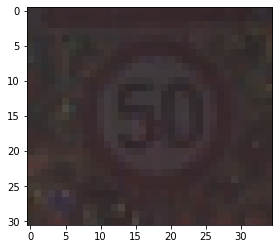

In [12]:
img=plt.imread(r"C:\Users\vishu\Downloads\archive(2)/Train/2/00002_00000_00001.png")
plt.imshow(img,cmap="gray")

In [13]:
img=cv2.imread(r"C:\Users\vishu\Downloads\archive(2)\Train\7\00007_00000_00014.png",cv2.IMREAD_GRAYSCALE)

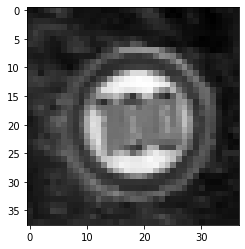

In [14]:
plt.imshow(img,cmap="gray")

In [15]:
img_thresh_adap=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)

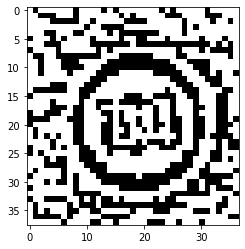

In [16]:
plt.imshow(img_thresh_adap,cmap="gray")

In [23]:
kernel_filter=np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])
kernel_filter=np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

In [24]:
new=cv2.filter2D(img,2,kernel_filter)

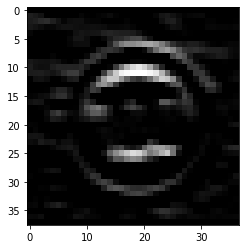

In [25]:
plt.imshow(new,cmap="gray")

In [58]:
np.array(img_thresh_adap)

array([[255,   0, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ..., 255, 255, 255],
       ...,
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8)

In [12]:
img.shape

(31, 35, 3)

In [67]:
num=43
data=[]
labels=[]
cur_path=os.getcwd()
for i in range(num):
    new_path=os.path.join(cur_path,'Train',str(i))
    images_dir=os.listdir(new_path)
    for x in images_dir:
        try:
            image_path=os.path.join(new_path,x)
            img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            img_thresh_adap=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
            image=img_thresh_adap.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading an image")

In [12]:
num=43
data=[]
labels=[]
cur_path=os.getcwd()
for i in range(num):
    new_path=os.path.join(cur_path,'Train',str(i))
    images_dir=os.listdir(new_path)
    for x in images_dir:
        try:
            image_path=os.path.join(new_path,x)
            image=Image.open(image_path)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading an image")

In [13]:
print(len(data))
print(len(labels))

39209
39209


In [14]:
print(type(data))
print(type(labels))

<class 'list'>
<class 'list'>


In [15]:
data,labels=np.array(data),np.array(labels)

In [16]:
data=data/255

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [18]:
print(data.shape,labels.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (31367,) (7842, 30, 30, 3) (7842,)


In [19]:
from keras.utils import to_categorical

In [20]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D

In [26]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(43,activation="softmax"))

In [27]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/20
491/491 [==============================] - 75s 148ms/step - loss: 2.1264 - accuracy: 0.4237 - val_loss: 0.2195 - val_accuracy: 0.9314
Epoch 2/20
491/491 [==============================] - 72s 147ms/step - loss: 0.2550 - accuracy: 0.9209 - val_loss: 0.1414 - val_accuracy: 0.9542
Epoch 3/20
491/491 [==============================] - 76s 155ms/step - loss: 0.1495 - accuracy: 0.9526 - val_loss: 0.0724 - val_accuracy: 0.9779
Epoch 4/20
491/491 [==============================] - 90s 182ms/step - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.0641 - val_accuracy: 0.9814
Epoch 5/20
491/491 [==============================] - 88s 180ms/step - loss: 0.0780 - accuracy: 0.9750 - val_loss: 0.0664 - val_accuracy: 0.9818
Epoch 6/20
491/491 [==============================] - 97s 198ms/step - loss: 0.0780 - accuracy: 0.9753 - val_loss: 0.0521 - val_accuracy: 0.9851
Epoch 7/20
491/491 [==============================] - 99s 201ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0518 - val_ac

In [25]:
print(len(x_train))
print(len(y_train))

31367
31367


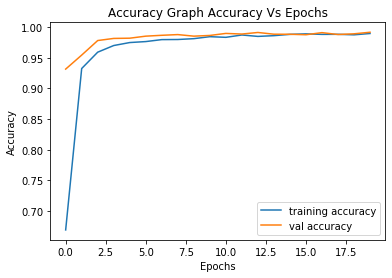

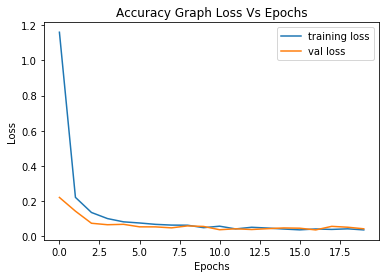

In [30]:
plt.figure(0)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.title("Accuracy Graph Accuracy Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
plt.figure(1)
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="val loss")
plt.title("Accuracy Graph Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [31]:
label_dict={
    0:"speed limit 20 km/h",
    1:"speed limit 30 km/h",
    2:"speed limit 50 km/h",
    3:"speed limit 60 km/h",
    4:"speed limit 70 km/h",
    5:"speed limit 80 km/h",
    6:"End of speed limit 80 km/h",
    7:"speed limit 100 km/h",
    8:"speed limit 120 km/h",
    9:"No passing",
    10:"No passing vehicles over 3.5 tons",
    11:"Right of the wat ar intersection",
    12:"priority road",
    13:"Yield",
    14:"Stop",
    15:"No vehicles",
    16:"Vehicles above 3.5 tons prohibited",
    17:"No entry",
    18:"General caution",
    19:"Dangerous curve left",
    20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'
}

In [36]:
import urllib.request as req
import urllib3

Enter an url of an image

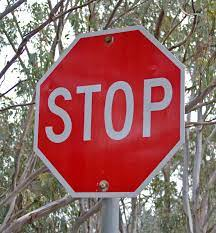

In [40]:
img_url=input("Enter an url of an image")
test_img=req.urlretrieve(img_url,"new_image.png")

In [41]:
test_image=Image.open("new_image.png").convert('RGB')

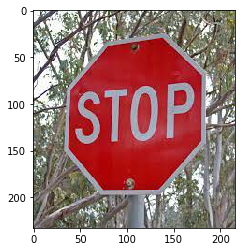

In [42]:
plt.imshow(test_image)
plt.show()

In [43]:
test_image=test_image.resize((30,30))
test_image=np.array(test_image)
test_image=test_image/255


In [44]:
image_pred=model.predict_classes([np.expand_dims(test_image, 0)])[0]

C:\Users\vishu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
image_pred.shape

()

In [46]:
image_pred

14

In [47]:
label_dict[image_pred]

'Stop'

In [48]:
image_pred=model.predict(np.expand_dims(test_image, 0))

In [49]:
np.where(image_pred==np.amax(image_pred))

(array([0], dtype=int64), array([14], dtype=int64))

In [50]:
label=list(label_dict.keys())

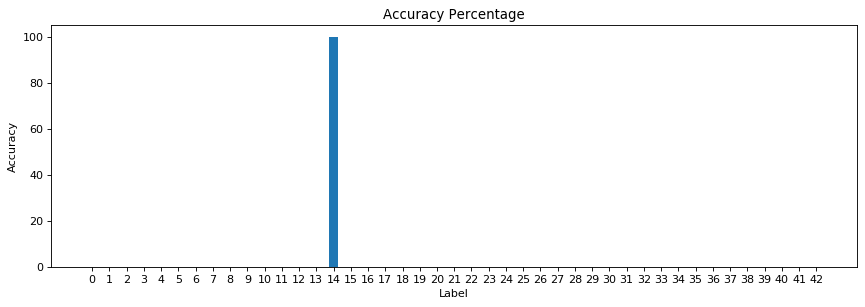

In [51]:
acc_perc=image_pred[0]*100
plt.figure(figsize=(13, 4), dpi=80)
plt.bar(label,acc_perc,width=0.5)
plt.title("Accuracy Percentage")
plt.xlabel("Label")
plt.xticks(label)
plt.ylabel("Accuracy")
plt.show()

In [200]:
len(image_pred)

1

In [199]:
len(label)

43

In [207]:
label_dict

{0: 'speed limit 20 km/h',
 1: 'speed limit 30 km/h',
 2: 'speed limit 50 km/h',
 3: 'speed limit 60 km/h',
 4: 'speed limit 70 km/h',
 5: 'speed limit 80 km/h',
 6: 'End of speed limit 80 km/h',
 7: 'speed limit 100 km/h',
 8: 'speed limit 120 km/h',
 9: 'No passing',
 10: 'No passing vehicles over 3.5 tons',
 11: 'Right of the wat ar intersection',
 12: 'priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles above 3.5 tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve left',
 20: 'Dangerous curve right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End speed + passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Ke

In [143]:
from urllib.request import Request

In [146]:
def predict_signs(img_url):
    test_img=req.urlretrieve(img_url,"new_image.png")
    test_image=Image.open("new_image.png").convert('RGB')
    plt.imshow(test_image)
    test_image=test_image.resize((30,30))
    test_image=np.array(test_image)
    test_image=test_image/255
    image_pred=model.predict_classes([np.expand_dims(test_image, 0)])[0]
    print(image_pred)
    acc_perc=model.predict(np.expand_dims(test_image,0))*100
    plt.figure(figsize=(13, 4), dpi=80)
    plt.bar(label,acc_perc[0],width=0.5)
    plt.title("Accuracy Percentage")
    plt.xlabel("Label")
    plt.xticks(label)
    plt.ylabel("Accuracy")
    plt.show()
    return label_dict[image_pred],np.amax(acc_perc)

In [115]:
def predict_signs_a(img_url):
    test_img=Image.open(img_url)
    test_image=test_img.resize((30,30))
    test_image=np.array(test_image)
    test_image=test_image/255
    image_pred=model.predict_classes([np.expand_dims(test_image, 0)])[0]
    print(image_pred)
    acc_perc=model.predict(np.expand_dims(test_image,0))*100
    plt.figure(figsize=(13, 4), dpi=80)
    plt.bar(label,acc_perc[0],width=0.5)
    plt.title("Accuracy Percentage")
    plt.xlabel("Label")
    plt.xticks(label)
    plt.ylabel("Accuracy")
    plt.show()
    return label_dict[image_pred],np.amax(acc_perc)

Enter the url of the imagehttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFziO6jYspcCdqsO4aNw2ZFKPDyUHA2VqhP5rnVOyhgB2pYeOY4THl50aS_dAA4jbUGcQ&usqp=CAU


C:\Users\vishu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9


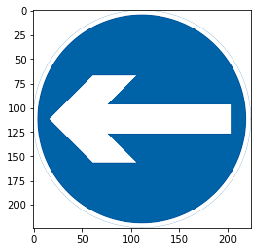

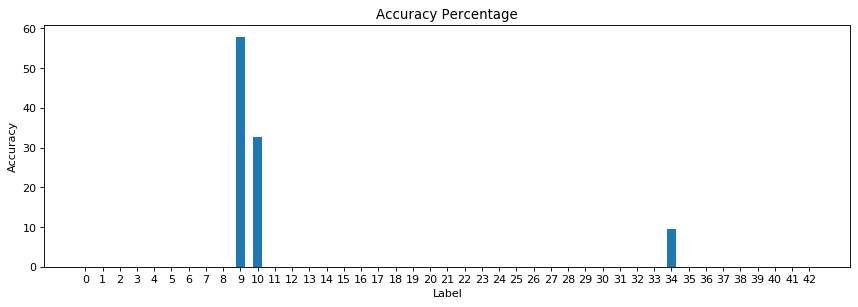

('No passing', 57.89796)

In [147]:

url=input("Enter the url of the image")
predict_signs(url)

In [ ]:
print("a")

In [33]:
model.save("traffic_sign.h5")

In [96]:
current_path=os.getcwd()

In [101]:
new_img_dir=os.listdir(current_path)
print(new_img_dir[:20])

['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png']


00000.png
16


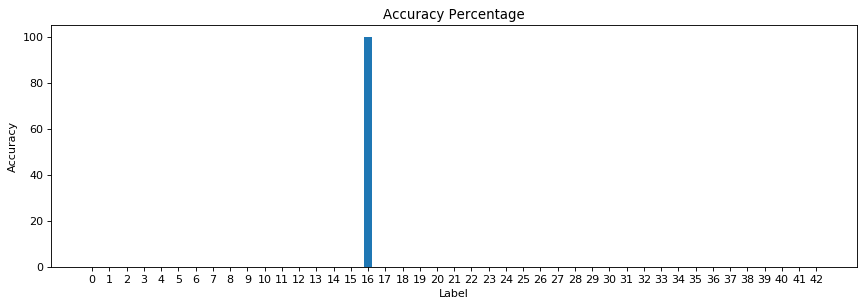

('Vehicles above 3.5 tons prohibited', 100.0)
--------------------------------------------------
00001.png
1


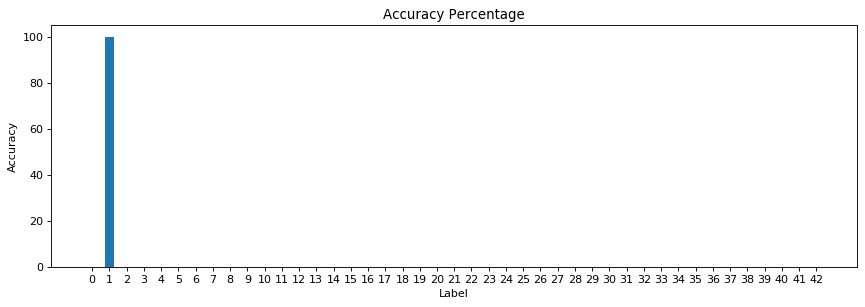

('speed limit 30 km/h', 100.0)
--------------------------------------------------
00002.png
38


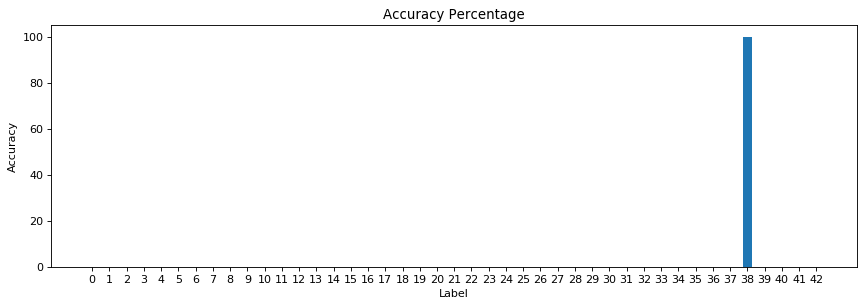

('Keep right', 100.0)
--------------------------------------------------
00003.png
33


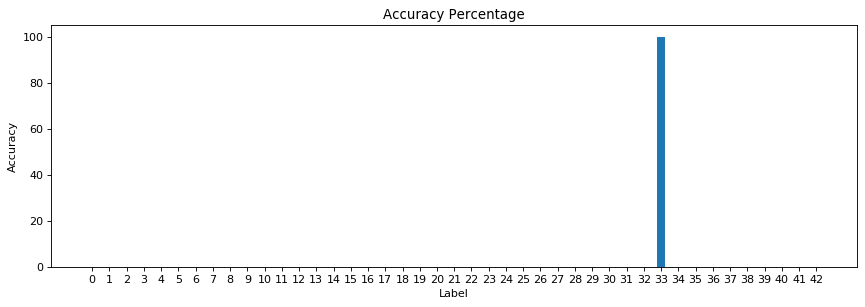

('Turn right ahead', 100.0)
--------------------------------------------------
00004.png
11


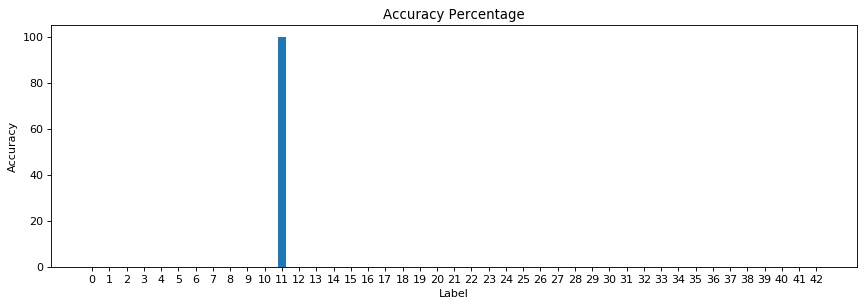

('Right of the wat ar intersection', 100.0)
--------------------------------------------------
00005.png
38


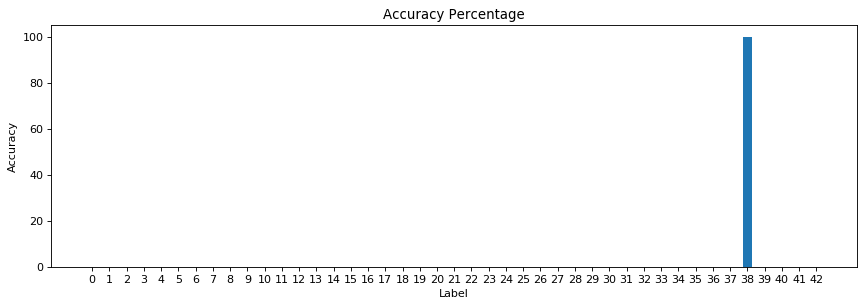

('Keep right', 100.0)
--------------------------------------------------
00006.png
18


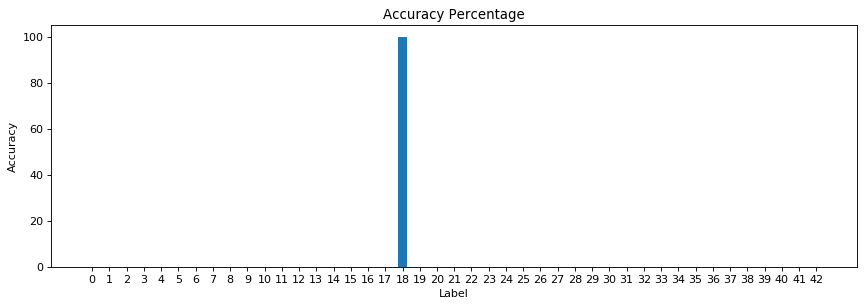

('General caution', 100.0)
--------------------------------------------------
00007.png
12


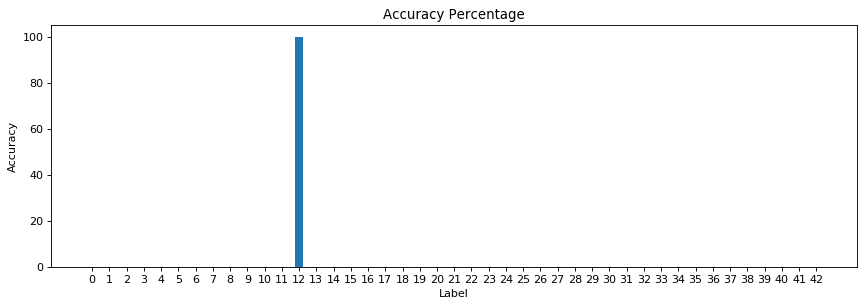

('priority road', 99.99974)
--------------------------------------------------
00008.png
25


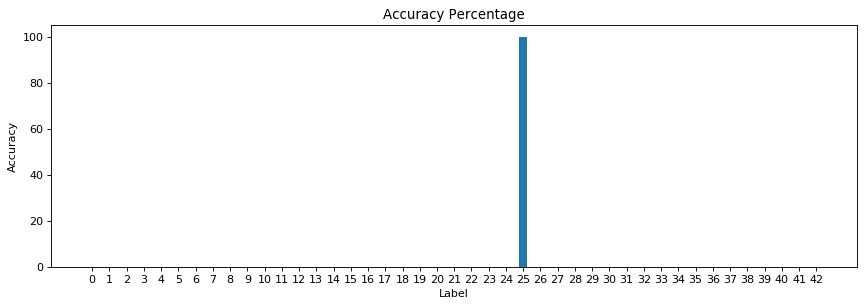

('Road work', 100.0)
--------------------------------------------------
00009.png
35


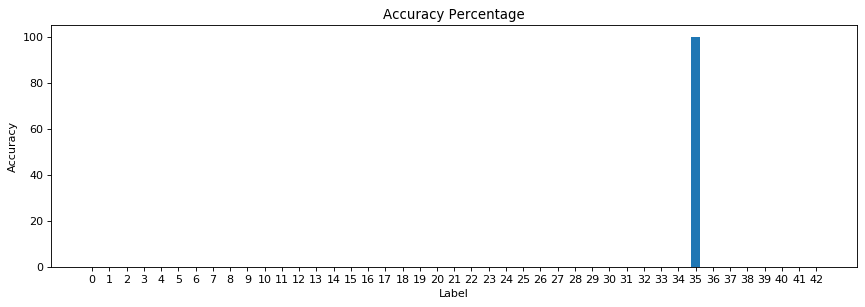

('Ahead only', 100.0)
--------------------------------------------------
00010.png
12


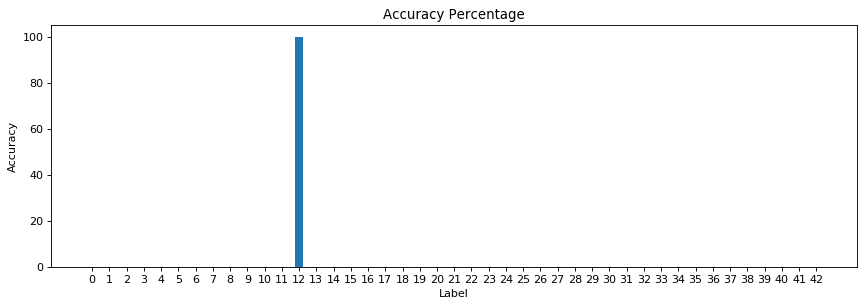

('priority road', 99.999916)
--------------------------------------------------
00011.png
7


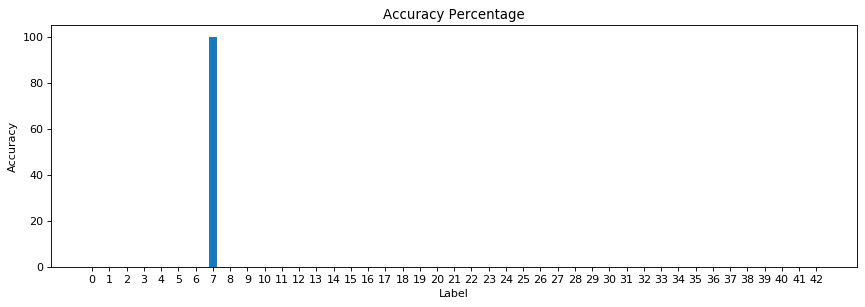

('speed limit 100 km/h', 100.0)
--------------------------------------------------
00012.png
23


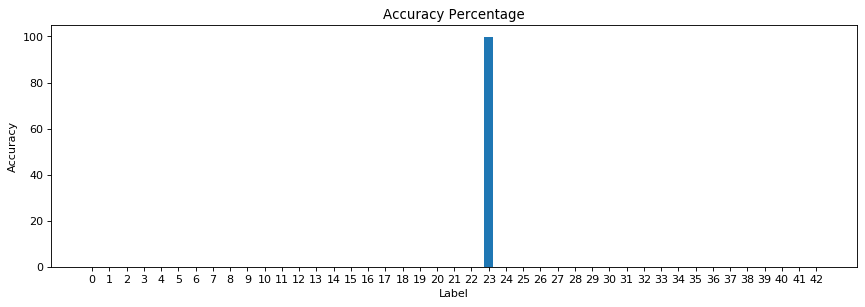

('Slippery road', 99.91333)
--------------------------------------------------
00013.png
7


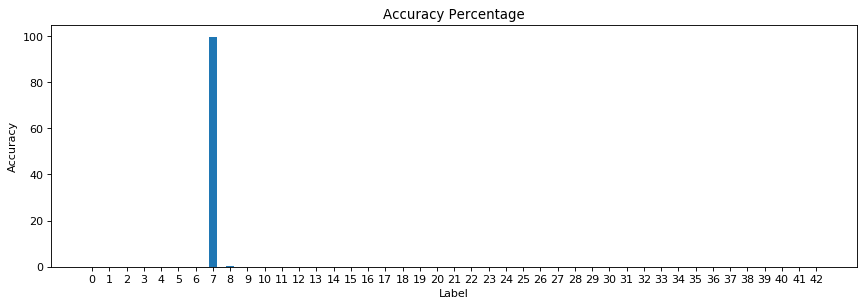

('speed limit 100 km/h', 99.72718)
--------------------------------------------------
00014.png
4


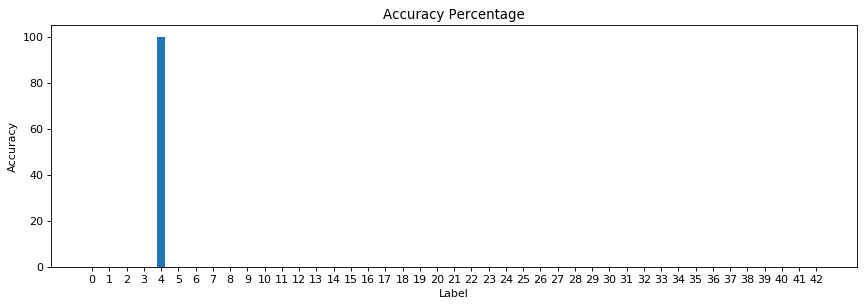

('speed limit 70 km/h', 99.999985)
--------------------------------------------------
00015.png
9


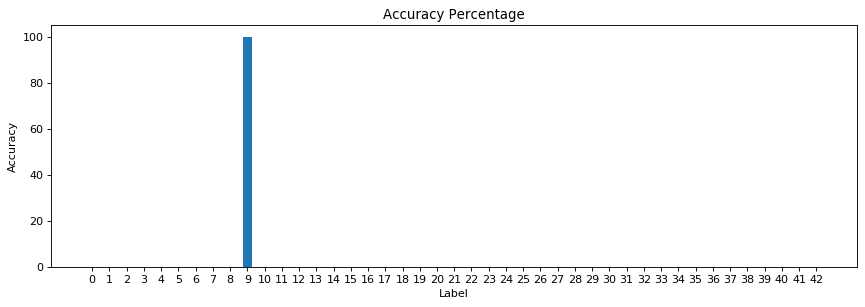

('No passing', 100.0)
--------------------------------------------------
00016.png
2


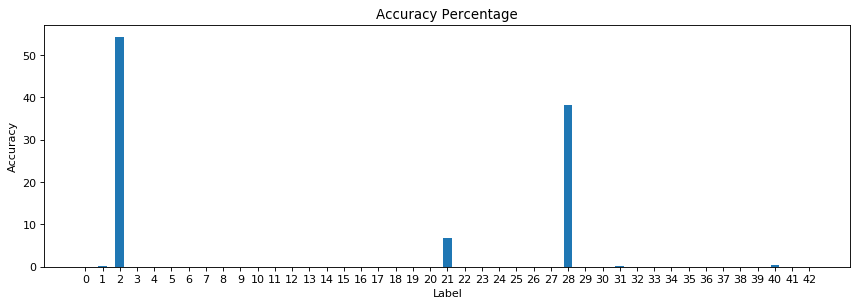

('speed limit 50 km/h', 54.352943)
--------------------------------------------------
00017.png
20


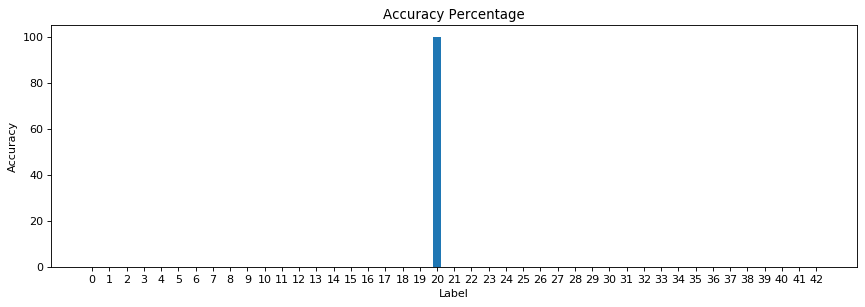

('Dangerous curve right', 100.0)
--------------------------------------------------
00018.png
27


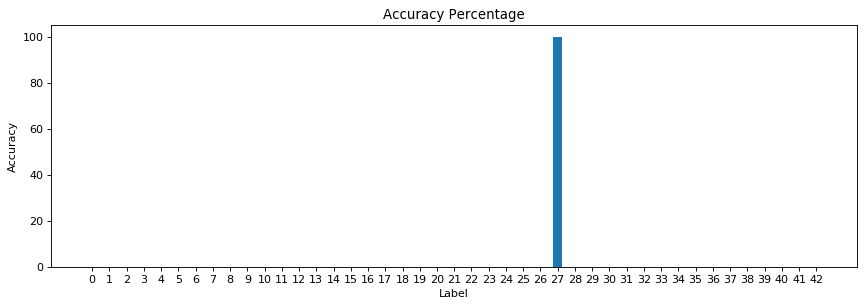

('Pedestrians', 99.99513)
--------------------------------------------------
00019.png
38


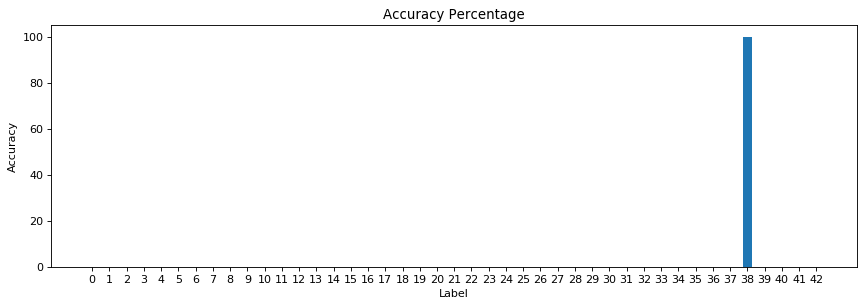

('Keep right', 100.0)
--------------------------------------------------


In [109]:
for i in new_img_dir[:20]:
    print(i)
    new_path=os.path.join(current_path,str(i))
    print(predict_signs_a(new_path))
    print("-"*50)

In [88]:
import urllib.parse

In [13]:
a=10